In [ ]:
!pip install --user matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Модель содержания коффеина в крови

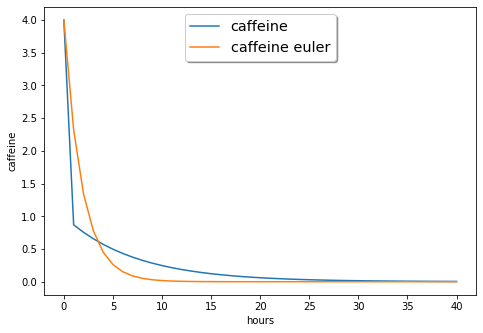

In [42]:
start = 4
caffeine_1 = [start] # начальные данные
caffeine_2 = [start]

n = 40 # количество шагов
h = 3

for i in range(n):
    caffeine_1.append(math.e**((-0.14*(i+1))))
    caffeine_2.append(caffeine_2[i] - 0.14 * caffeine_2[i] * h)

artist = plt.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("hours")
ax.set_ylabel("caffeine")
ax.plot(range(n+1), caffeine_1, label = 'caffeine')
ax.plot(range(n+1), caffeine_2, label = 'caffeine euler')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

## SIR модель  

**S** -- susceptible individuals  
**I** -- infected individuals  
**R** -- recovered individuals  
**N** -- population size  
**betta** -- заразность ($\beta$)  
**gamma** -- смертность ($\gamma$)  

$S(t+h)=S(t)-\beta*\frac{S(t)*I(t)}{N}*h$

$I(t+h)=I(t)+h*(\beta*\frac{S(t)*I(t)}{N}-\gamma*I(t))$

$R(t+h)=R(t)+h*\gamma*I(t)$

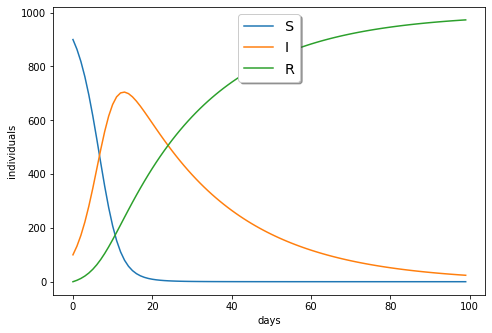

In [70]:
S = [900]
I = [100]
R = [0]
N = S[0]+I[0]+R[0]

betta = 0.4 # 0.5
gamma = 0.04 # 0.1

h = 1
n = 100 # кол-во шагов/дней

for i in range(1, n):
    S.append(S[i-1] - betta*S[i-1]*I[i-1]*h/N)
    I.append(I[i-1] + h*(betta*S[i-1]*I[i-1]/N - gamma*I[i-1]))
    R.append(R[i-1] + h*gamma*I[i])

artist = plt.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("days")
ax.set_ylabel("individuals")
ax.plot(range(n), S, label='S')
ax.plot(range(n), I, label='I')
ax.plot(range(n), R,label='R')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

## Модель хищник-жертва

$R_{n+1}=R_{n}+b(n)*R_{n}-a*F_{n}*R_{n}$  
$F_{n+1}=F_{n}-d_{f}*F_{n}+a*F_{n}*R_{n}$  
  
**R_n** - число жертв  
**F_n** - число хищников  
**b(n)** - скорость размножения жертв  
**а** - процент удачных охот  
**d_f** - смертность хищников  
**F_n * R_n** - количество встрч хищник-жертва  

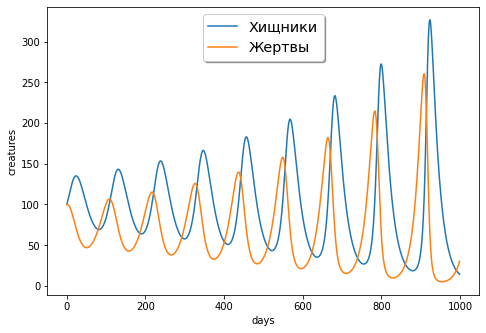

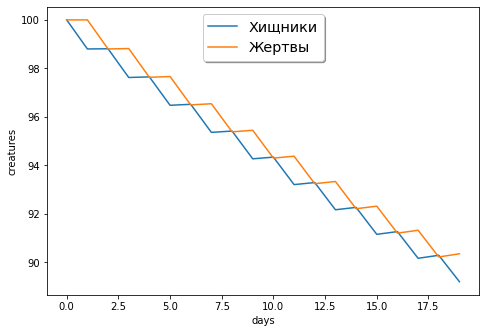

In [83]:
R = [100]
F = [100]

# коэфиценты модели
a = 0.0007
b = 0.07
d_f = 0.05

n = 1000 # кол-во шагов/дней
h = 0.1

for i in range(1, n):
    delta = a * F[i-1]*R[i-1]
    F.append(F[i-1]-d_f*F[i-1]+delta)
    R.append(R[i-1]+b*R[i-1]-delta)

artist = plt.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("days")
ax.set_ylabel("creatures")
ax.plot(range(n), F, label='Хищники')
ax.plot(range(n), R, label='Жертвы')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

R = [100]
F = [100]

# коэфиценты модели
a = 0.0007
b = 0.07
d_f = 0.05

n = 20 # кол-во шагов/дней
h = 0.1

for i in range(1, n):
    delta = a*F[i-1]*R[i-1]
    F.append(R[i-1] - h*(d_f*R[i-1]+delta))
    R.append(F[i-1] + h*( b *F[i-1]-delta))

artist = plt.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("days")
ax.set_ylabel("creatures")
ax.plot(range(n), F, label='Хищники')
ax.plot(range(n), R, label='Жертвы')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

### Теперь b зависит от вермени
$b(n) = e^{-\alpha n}*0.07 \quad \alpha =0.14$

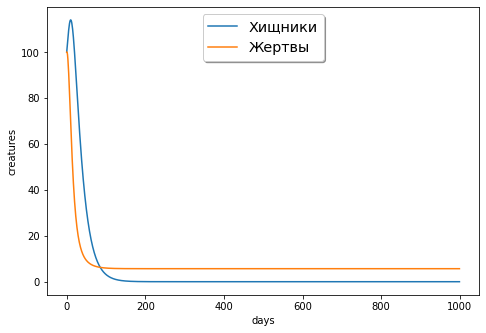

In [84]:
R = [100]
F = [100]
b = [0.07] # b зависит от времени
alpha = 0.14

# коэфиценты модели
a = 0.0007
d_f = 0.05

n = 1000 # кол-во шагов/дней

for i in range(1, n):
    delta = a * F[i-1]*R[i-1]
    F.append(F[i-1]-d_f*F[i-1]+delta)
    R.append(R[i-1]+b[i-1]*R[i-1]-delta)
    b.append(math.exp(-alpha*i)*0.07)


artist = plt.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("days")
ax.set_ylabel("creatures")
ax.plot(range(n), F, label='Хищники')
ax.plot(range(n), R, label='Жертвы')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()